In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

Lab1

In [146]:
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


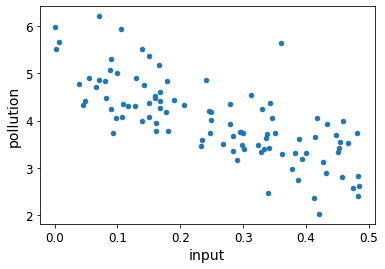

In [147]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

Lab2

In [148]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
print(x.shape, y.shape)

x = x[:, np.newaxis]
print(x.shape, y.shape)

(100,) (100,)
(100, 1) (100,)


In [149]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

# 연습문제

## 문제 1,2 데이터 준비사항
* np.random.seed(42)
* X = 5 * np.random.rand(100,1)
* y = 20 + 9 * X + np.random.rand(100,1) * 3
* lin_data = pd.DataFrame(np.concatenate((x,y), axis=1), columns=['x', 'y'])

### 1. 데이터 준비

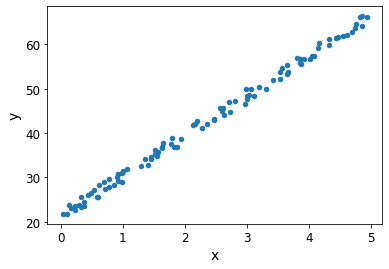

In [150]:
np.random.seed(42)
x = 5 * np.random.rand(100,1)
y = 20 + 9*x +np.random.rand(100,1)*3

lin_data = pd.DataFrame(np.concatenate((x,y), axis=1), columns=['x', 'y'])
lin_data.plot(kind = 'scatter', x = 'x', y = 'y')

### 2. Finding 'param'

In [162]:
def h(x, param):
  return param[0]*x + param[1]

learning_iteration = 100
learning_rate = 0.05

param = [1,1]

x = lin_data['x'].to_numpy()
y = lin_data['y'].to_numpy()

print(x.shape, y.shape)
print(param)

(100,) (100,)
[1, 1]


In [168]:
eta = 0.1  # 학습률
n_iterations = 1000 #반복횟수
m = 100 # 샘플의 갯수
x_b = np.c_[np.ones((100,1)) ,x]
weight = np.random.randn(2, 1)  # 초기 랜덤 파라미터 설정

for step in range(n_iterations): 
    gradients = 2/m * x_b.T.dot(x_b.dot(weight) - y) #기울기 계산
    weight = weight - eta * gradients # 학습률의 크기만큼 기울기 방향으로 이동
     
     #파라미터의 변화 파악
    if (step+1) % 200 == 0:
        print('Step :{:04d}, weight = \n {}'.format(step+1, weight))
    
print('최종 결과값 : \n{}'.format(weight))

Step :0200, weight = 
 [[3.69477550e+01 6.46899309e+01 5.38815874e+01 4.84642543e+01
  2.97428578e+01 2.77669928e+01 2.38443597e+01 6.12432112e+01
  4.77354964e+01 5.20930369e+01 2.17950498e+01 6.41281753e+01
  6.02476647e+01 3.19788918e+01 3.00816469e+01 3.08668797e+01
  3.61010977e+01 4.41727538e+01 4.21142520e+01 3.47225487e+01
  4.99545786e+01 2.89648341e+01 3.40997439e+01 3.68156037e+01
  4.12060238e+01 5.66129740e+01 3.14386470e+01 4.57217118e+01
  4.66784614e+01 2.36219637e+01 4.85906590e+01 2.83392592e+01
  2.32863784e+01 6.37112719e+01 6.62806917e+01 5.73462058e+01
  3.52631904e+01 2.65036923e+01 5.18802108e+01 4.27212444e+01
  2.83784118e+01 4.30373368e+01 2.30386950e+01 6.18206716e+01
  3.24988799e+01 4.99230422e+01 3.58548774e+01 4.49100861e+01
  4.47553903e+01 2.91537223e+01 6.63546254e+01 5.55984172e+01
  6.27107361e+01 6.17342095e+01 4.98613303e+01 6.22091165e+01
  2.59979706e+01 3.11033774e+01 2.27476130e+01 3.68236787e+01
  3.85929536e+01 3.41068481e+01 5.91924530e+01 

In [161]:
print(param)

[nan, nan]


## Question 2
Using Scikit-Learn, find the [regr.coef_, regr.intercept_]
* ans:
* [array([[8.97988101]]), array([21.54079297])]

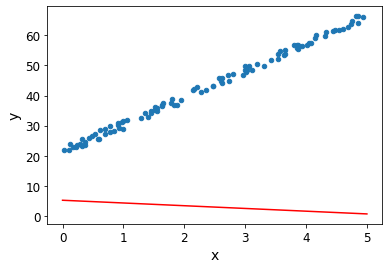

In [154]:
lin_data.plot(kind = 'scatter', x = 'x', y= 'y')
y_pred = regr.predict([[0], [1]])
plt.plot([0,5], y_pred, 'r')

In [155]:
print([regr.coef_, regr.intercept_])

[array([-4.54449866]), 5.17550358024579]
